# The Bank Marketing Campaign

The **Bank Marketing Campaign Dataset** comes from a Portuuguese banking institution. It records the results of phone-based marketing campaigns for term deposit subscriptions.
**Objective**: To predict whether a client will subscribe to a term deposit or not (yes/no). Through this we could help banks identify which customers are most likely to convert and therefore optimize their marketing strategies, save resources and improve campaign effectiveness

### What is a Term Deposit?
A **Term Deposit** is a deposit that a bank or financial institution offers with a fixed rate in which your money will be returned back at a specific maturity time

## Procedure
We need to extract meaning from a our data and thus we're going to follow a series of steps to do just that:
1. Attribute Descriptions
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Model Selection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

Let's take a look at the data

In [2]:
df = pd.read_csv('bank.csv', sep=';')

df.head(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no


In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

## Attributes(Input Variables)
The Data has multiple attributes regarding the clients:
1. **Age** (numeric)
2. **Job** (categorical)
3. **Marital** (categorical)
4. **education** (categorical: primary, secondary, tertiary and unknown)
5. **default**: Has defaulted on a loan or credit (categorical: 'no', 'yes', 'unkown')
6. **housing**: has housing loan (categorical: 'no', 'yes', 'unknown')
7. **balance**: Balance on the individual's account
8. **contact**: contact communication type (categorical: 'cellular', 'telephone')
9. **month**: last contact month of the year(categorical: 'Jan'...'Dec')
10. **day**: last contact day of the week (categorical: 'mon'...'fri')
11. **duration**: last contact duration in seconds (numeric)
12. **campaign**: number of contacts performed during this campaign and for this client (numeric)
13. **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric)
14. **poutcome**: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')
15. **loan**: has a personal loan? (categorical: 'no', 'yes' 'unknown')

## Output Variable(Target)
16. **y**: has the client subscribed to a term deposit? (binary: 'yes', 'no')

Let's look at a brief summary of the numerical data

In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


**Notes**:
- **Mean age** is ~ 41 with a **Standard Deviation** of ~ 10
- **Mean balance** is 1422 approximately with a standard deviation of 3009, this indicates heavy distribution across the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


Checking for any missing info and it appears we don't have any which is good because it makes our job easier.

## Exploratory Data Analysis
We analyze our data, looking for any correlations between variables, redundancies and any interesting patterns

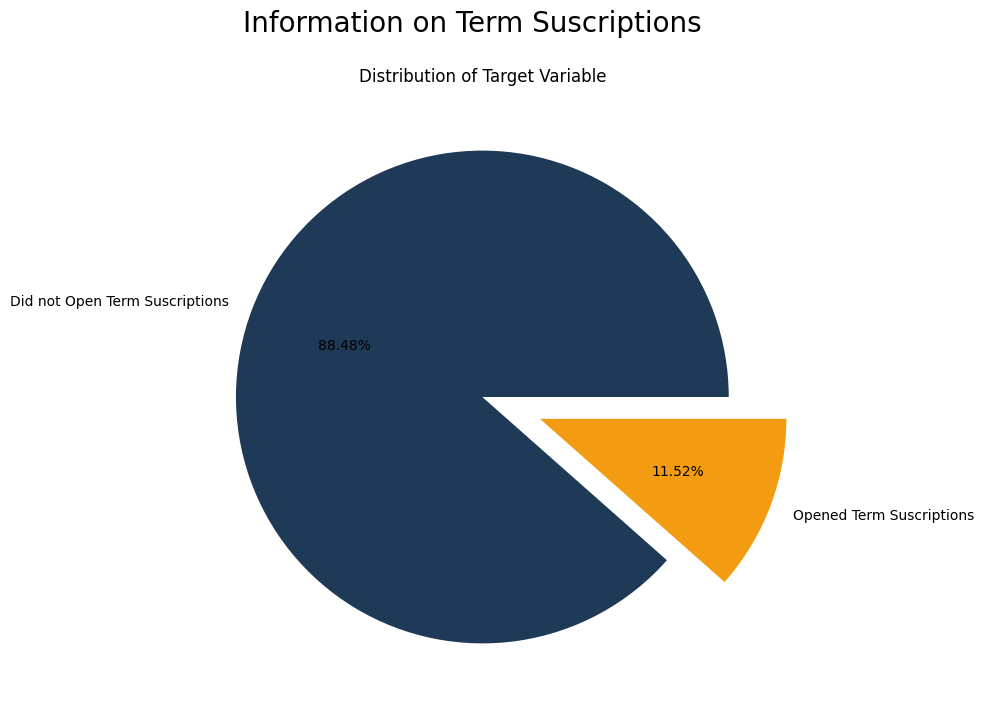

In [6]:
f, ax = plt.subplots(figsize=(8,8))

colors = ["#1F3A56", "#F39C12"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

ax.pie(df['y'].value_counts(), labels=labels, colors=colors, explode=[0,0.25], autopct='%1.2f%%')

ax.set_title('Distribution of Target Variable')

plt.show()

How is our numeric data distributed?

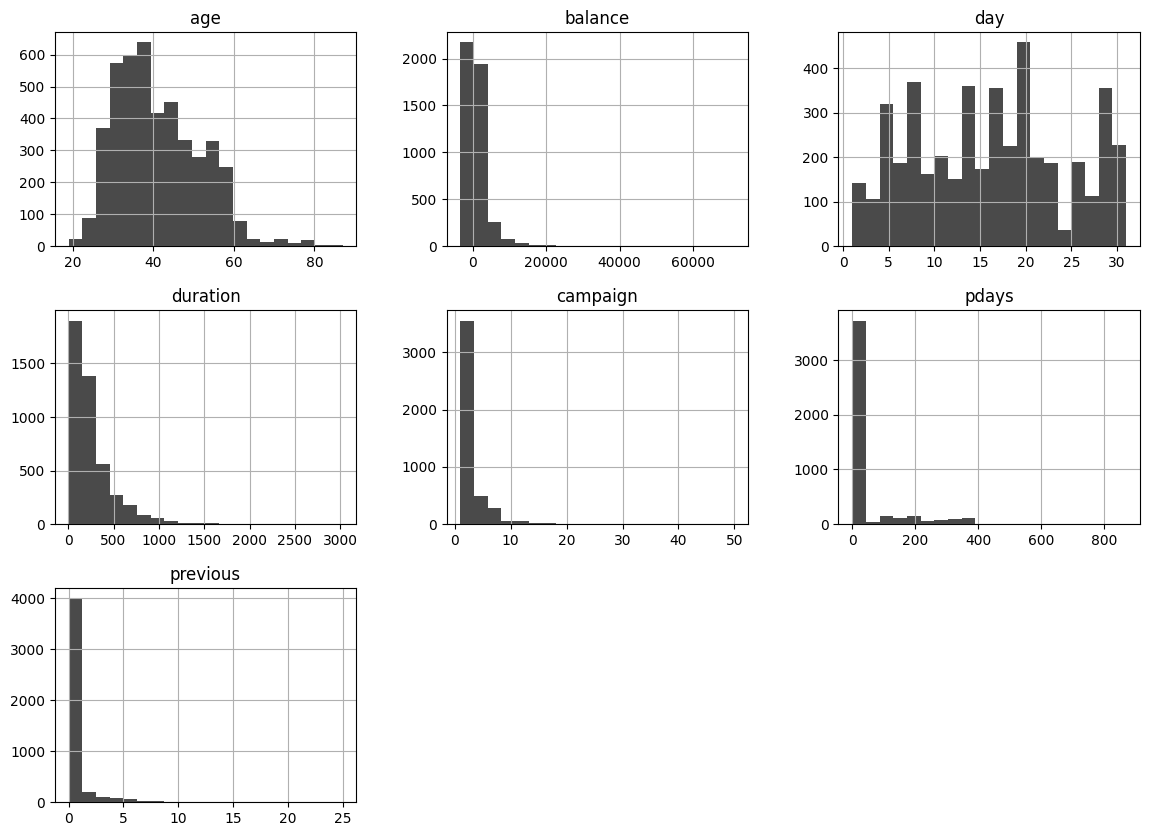

In [7]:
import matplotlib.pyplot as plt

# plt.style.available

plt.style.use('seaborn-v0_8-pastel')

df.hist(bins=20, figsize=(14, 10), color='#4A4A4A')

plt.show()

In [8]:
df['y'].value_counts()

y
no     4000
yes     521
Name: count, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_12604\172398007.py:16: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



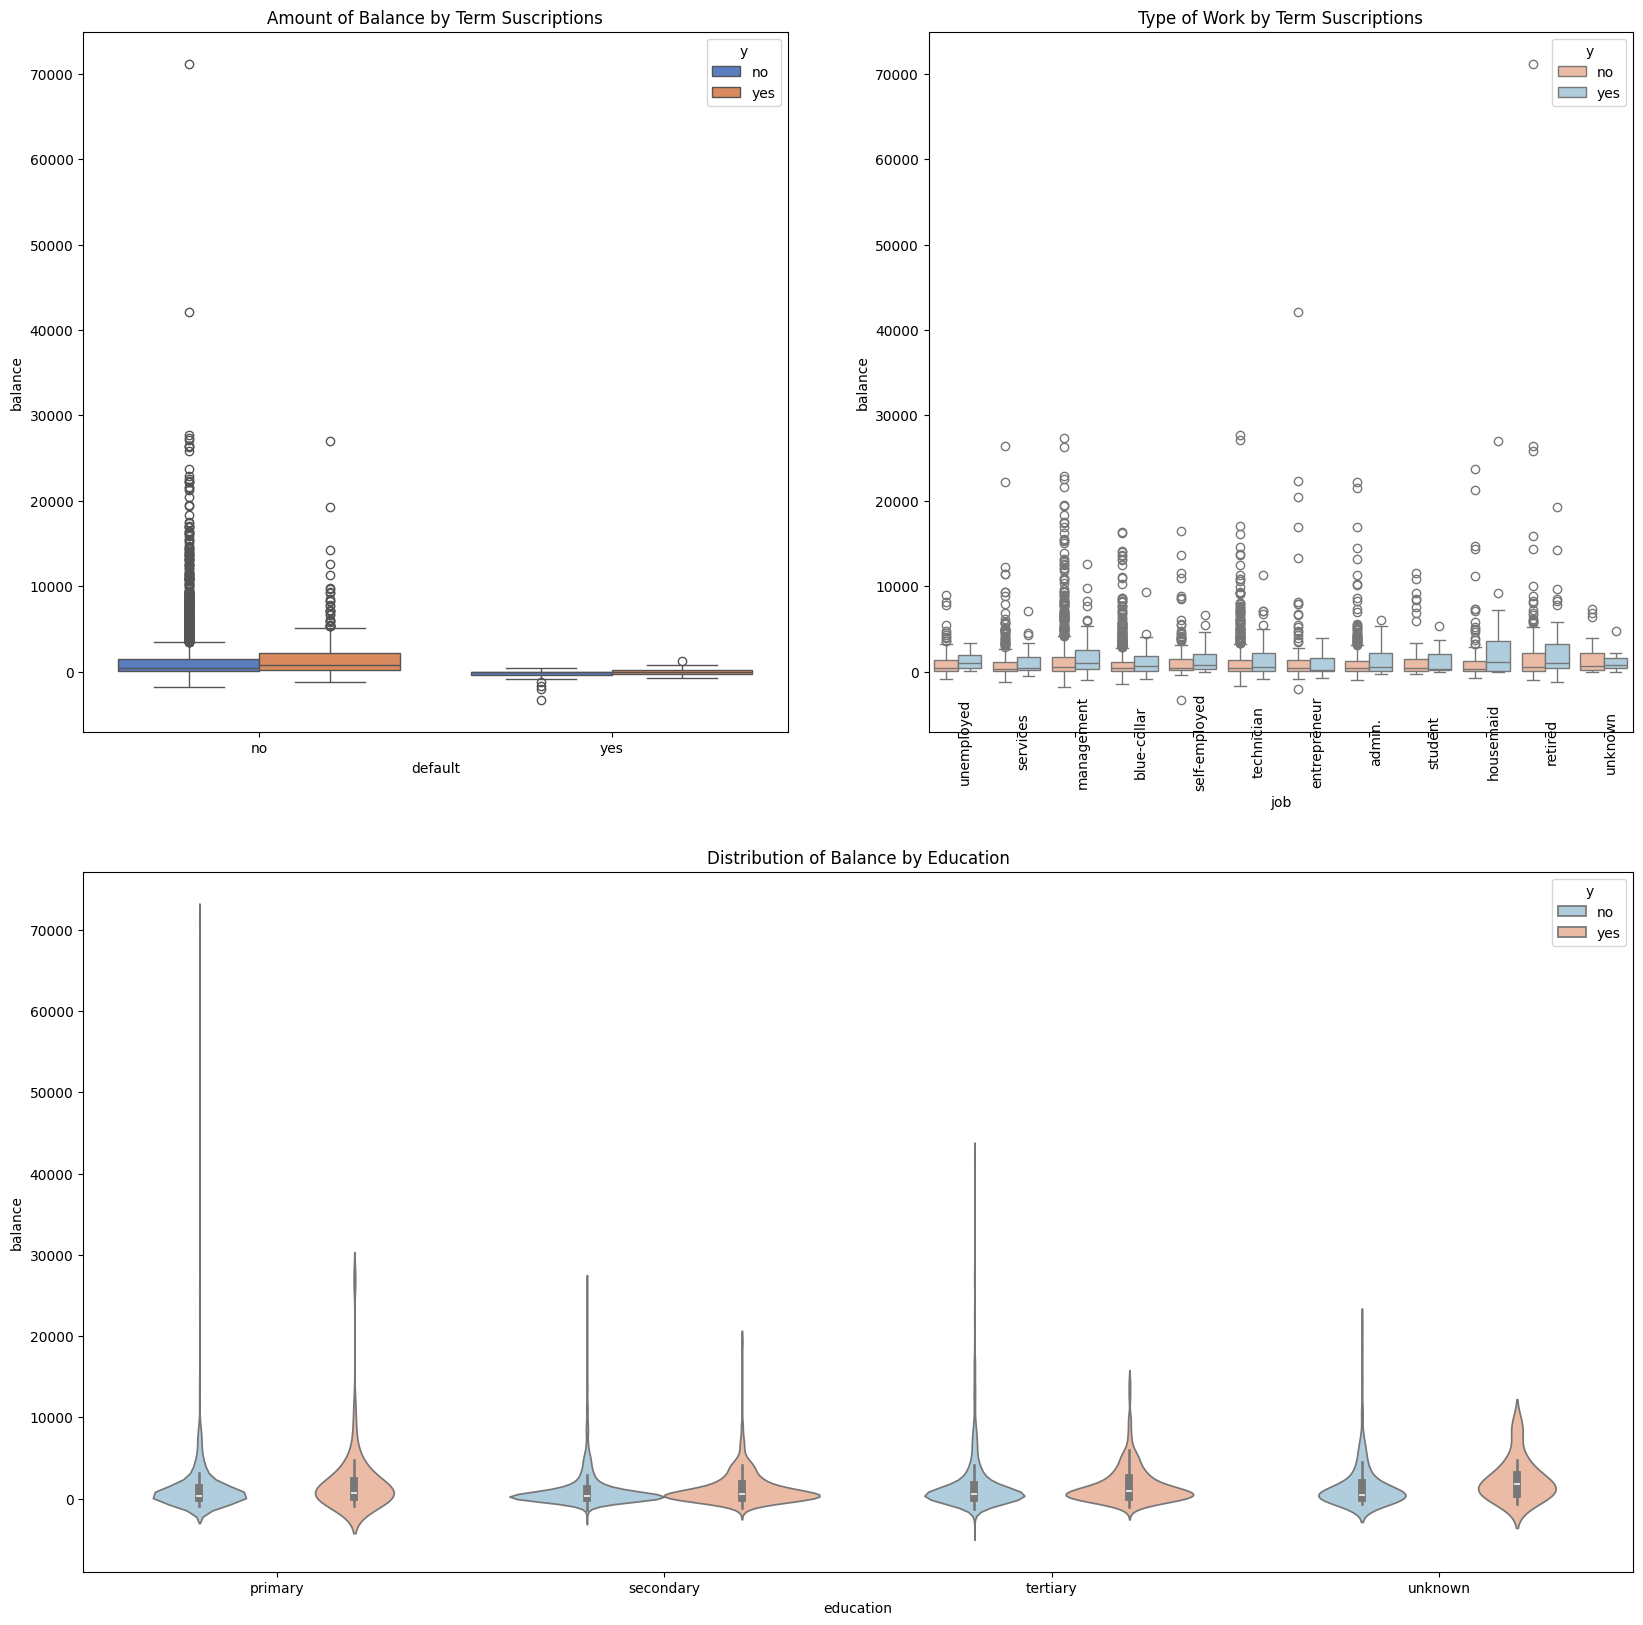

In [9]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="default", y="balance", hue="y",
                    data=df, palette="muted", ax=ax1)

g.set_title("Amount of Balance by Term Suscriptions")

# ax.set_xticklabels(df["default"].unique(), rotation=45, rotation_mode="anchor")

g1 = sns.boxplot(x="job", y="balance", hue="y",
                 data=df, palette="RdBu", ax=ax2)

g1.set_xticklabels(df["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Suscriptions")

g2 = sns.violinplot(data=df, x="education", y="balance", hue="y", palette="RdBu_r")

g2.set_title("Distribution of Balance by Education")


plt.show()

**g** shows the distribution of customer balances based on whether they defaulted or not and whether they subscribed to a term deposit. What it tells us essentially is the impact of term subscription; how term deposit subscription affects customers' balances in each default category.
**Observation**: Customers who didn't default had higher balances on their accounts and were more likely to subscribe to term deposits

**g1** shows how the job type of a customer influences their balance and also breaks down whether they subscribed to a term deposit. It shows the varying balance distributions by job type. More importantly, I believe, it shows the **effect of term subscription** i.e. it allows us to compare balances between customers who subscribed to the term deposit vs those who didn't, within each job category.
**Observation**: "Management" has higher average balances than the rest of the job categories

**g2(Violin Plot)**: shows the distribution of account balances based on a customer's education level, with a breakdown of whether the customer subscribed to a term deposit. It shows us the balance distribution by education; we observe the spread of balance across different levels of education. It also shows us whether education level influences the likelihood of subscribing to a term deposit.
**Observation**: The "no" category of the "primary" education has a larger range of account variability.
We also observe from this that factors beyond education are influencing account balances

Let's visualize the correlation between our variables

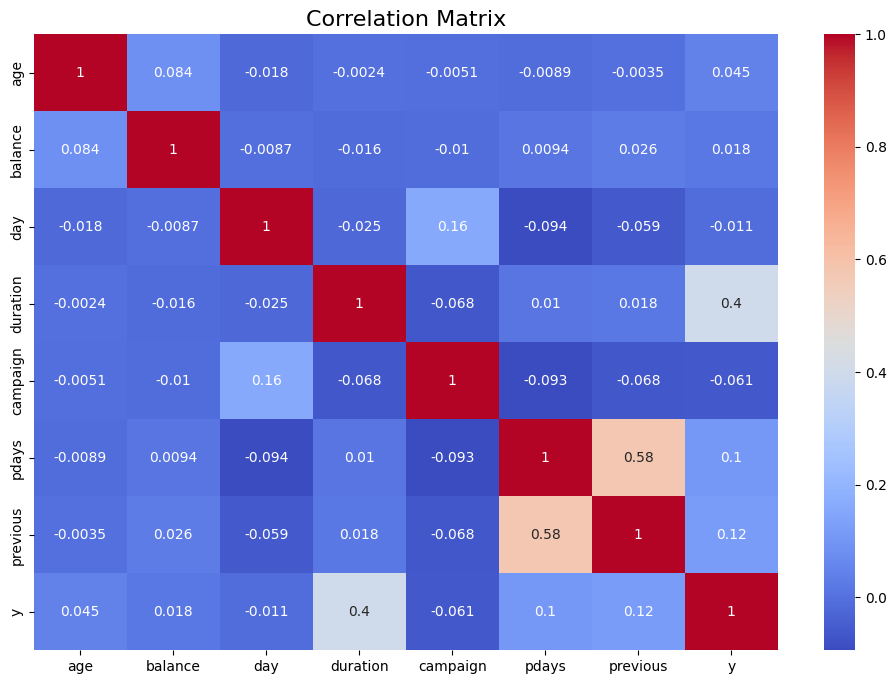

In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(12,8))
df['y'] = LabelEncoder().fit_transform(df['y'])



# Separate both dataframes into 
numeric_df = df.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()


sns.heatmap(corr_numeric, annot=True, cbar=True, cmap="coolwarm")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

We can observe that duration has a relatively high correlation with subscription to term deposits.

## Classification Model

In [11]:
term_deposits = df.copy()
dep = term_deposits['y']
term_deposits.drop(labels=['y'], axis=1,inplace=True)
term_deposits.insert(0, 'y', dep)
term_deposits.head()
# housing has a -20% correlation with deposit let's see how it is distributed.
# 52 %
term_deposits["housing"].value_counts()/len(term_deposits)

housing
yes    0.566025
no     0.433975
Name: count, dtype: float64

## Stratified Sampling:

Stratified Sampling: Is an important concept that is often missed when developing a model either for regression or classification. Remember, that in order ==to avoid overfitting of our data we must implement a cross validation== however, we must ==make sure that at least the features that have the greatest influence on our label== (whether a potential client will open a term deposit or not) ==is equally distributed.== What do I mean by this?

Personal Loans:  
For instance, having a personal loan is an important feature that determines whether a potential client will open a term deposit or not. To confirm it has a heavy weight on the final output you can check the correlation matrix above and you can see it has a -11% correlation with opening a deposit. What steps we should take before implementing stratified sampling in our train and test data?  
  
1) We need to see how our data is distributed.  
2) After noticing that the column of loan contains 87% of "no" (Does not have personal loans) and 13% of "yes" (Have personal loans.)  
3) We want to make sure that our training and test set contains the same ratio of 87% "no" and 13% "yes".

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
# Split the data into training and test sets and implement a stratified shuffle split.
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_set, test_set in stratified.split(term_deposits, term_deposits["loan"]):
    stratified_train = term_deposits.loc[train_set]
    stratified_test = term_deposits.loc[test_set]
    
stratified_train["loan"].value_counts()/len(df)
stratified_test["loan"].value_counts()/len(df)

loan
no     0.169653
yes    0.030524
Name: count, dtype: float64

We then proceed to seperate the labels and the features

In [13]:
train_data = stratified_train # Make a copy of the stratified training set.
test_data = stratified_test
train_data.shape
test_data.shape
train_data['y'].value_counts()

y
0    3193
1     423
Name: count, dtype: int64

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3616 entries, 1780 to 4439
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   y          3616 non-null   int32 
 1   age        3616 non-null   int64 
 2   job        3616 non-null   object
 3   marital    3616 non-null   object
 4   education  3616 non-null   object
 5   default    3616 non-null   object
 6   balance    3616 non-null   int64 
 7   housing    3616 non-null   object
 8   loan       3616 non-null   object
 9   contact    3616 non-null   object
 10  day        3616 non-null   int64 
 11  month      3616 non-null   object
 12  duration   3616 non-null   int64 
 13  campaign   3616 non-null   int64 
 14  pdays      3616 non-null   int64 
 15  previous   3616 non-null   int64 
 16  poutcome   3616 non-null   object
dtypes: int32(1), int64(7), object(9)
memory usage: 494.4+ KB


In [15]:
# Testing the OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np

data = np.array([['red'], ['green'], ['blue'], ['red'], ['green']])
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the data
encoded_data = encoder.fit_transform(data)

print("Encoded Data:")
print(encoded_data)


Encoded Data:
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


We then create a class to select the numerical or categorical columns

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

Next, we create the pipelines

In [25]:
train_data = stratified_train # Make a copy of the stratified training set.
test_data = stratified_test
train_data.shape
test_data.shape
train_data['y'].value_counts()

y
0    3193
1     423
Name: count, dtype: int64

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Define the columns
numerical_cols = ["age", "balance", "day", "campaign", "pdays", "previous", "duration"]
categorical_cols = ["job", "education", "marital", "default", "housing", "loan", "contact", "month", "poutcome"]
target_col = "y"

X_train = stratified_train.drop(columns=['y'])  # Features (all columns except 'deposit')
y_train = stratified_train['y']  # Target/Label (the 'deposit' column)

X_test = stratified_test.drop(columns=['y'])  # Features (all columns except 'deposit')
y_test = stratified_test['y']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the numerical pipeline (select columns and scale)
num_pipeline = Pipeline([
    ("selector", DataFrameSelector(numerical_cols)),  # Select numerical columns
    ("scaler", StandardScaler())                     # Scale numerical features
])

# Define the categorical pipeline (select columns and one-hot encode)
cat_pipeline = Pipeline([
    ("selector", DataFrameSelector(categorical_cols)),  # Select categorical columns
    ("onehot", OneHotEncoder())                         # One-hot encode categorical features
])

# Combine the numerical and categorical pipelines into a column transformer
preprocessor = ColumnTransformer([
    ("num", num_pipeline, numerical_cols),
    ("cat", cat_pipeline, categorical_cols)
])

# Transform the training and test data using the preprocessor (without training the model yet)
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Now, create and train the classifier separately
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_transformed)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Optional: Inspect the transformed data
print("\nTransformed Training Data:")
print(X_train_transformed)


Accuracy: 0.9018567639257294

Transformed Training Data:
[[ 1.47835762  0.94319315  0.48507409 ...  0.          0.
   1.        ]
 [-0.11427253  0.15257402 -1.21682702 ...  0.          0.
   1.        ]
 [-0.11427253  1.94234713  0.48507409 ...  0.          0.
   1.        ]
 ...
 [ 0.44783223 -0.32216012 -1.21682702 ...  0.          0.
   0.        ]
 [ 0.54151636 -0.35226168  0.60663846 ...  0.          0.
   1.        ]
 [ 1.57204174 -0.39977136  0.36350973 ...  0.          0.
   1.        ]]


In [26]:
print(y_train)

1412    0
2117    0
3443    0
1488    0
2620    0
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: y, Length: 3390, dtype: int32
